<a href="https://colab.research.google.com/github/falpachino/-_-/blob/main/%D1%85%D0%B0%D0%BA%D0%B0%D1%82%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from scipy import stats

1.	Выбрать и загрузить один из набор данных.
2.	Подготовить данные для анализа (избавиться от пропусков, определить формат файла для работы, проверить корректность отображения и т.д.)


In [ ]:
df = pd.read_csv('/content/sample_data/2. bikes_rent.csv')

In [ ]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


season: 1 - весна, 2 - лето, 3 - осень, 4 - зима

yr: 0 - 2011, 1 - 2012

mnth: от 1 до 12

holiday: 0 - нет праздника, 1 - есть праздник

weekday: от 0 до 6

workingday: 0 - нерабочий день, 1 - рабочий день

weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)

temp: температура в Цельсиях

atemp: температура по ощущениям в Цельсиях

hum: влажность

windspeed(mph): скорость ветра в милях в час

windspeed(ms): скорость ветра в метрах в секунду

cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [ ]:
df=df.drop('windspeed(mph)',axis=1)

In [ ]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,15.198937,8714.000000


Визуализация данных

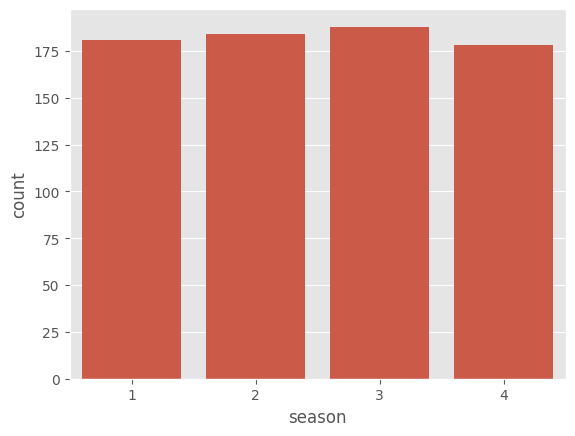

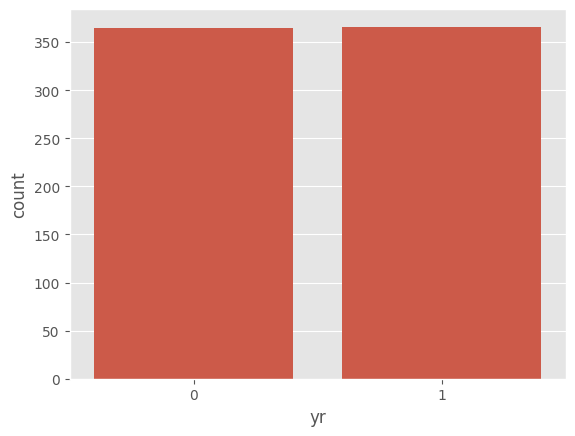

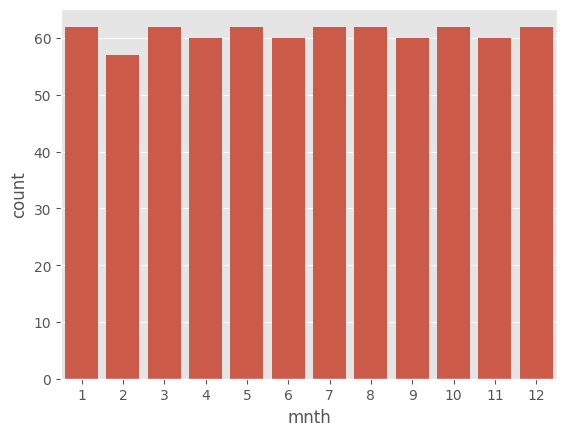

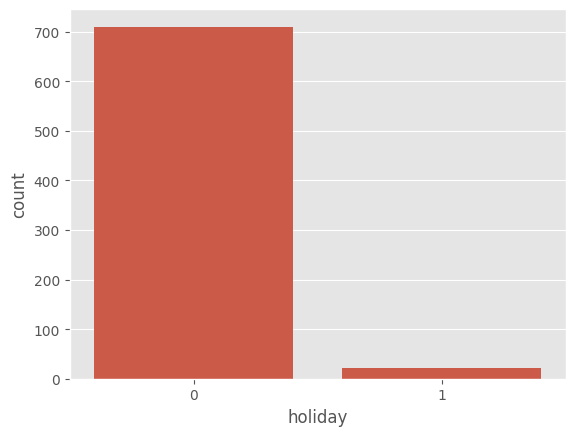

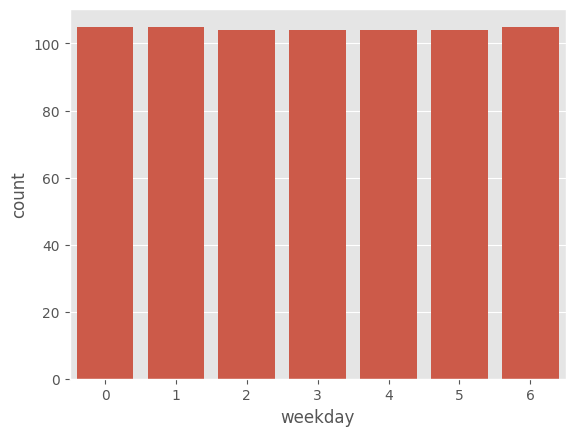

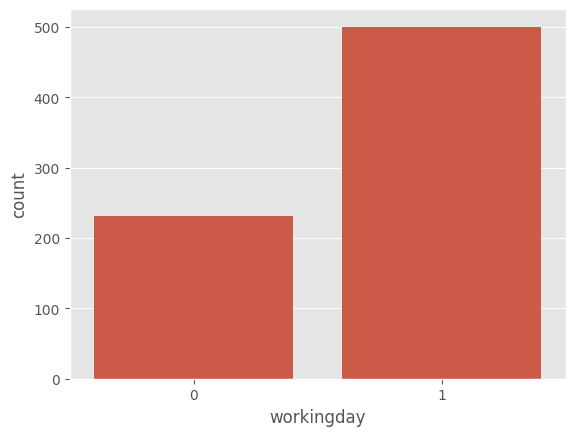

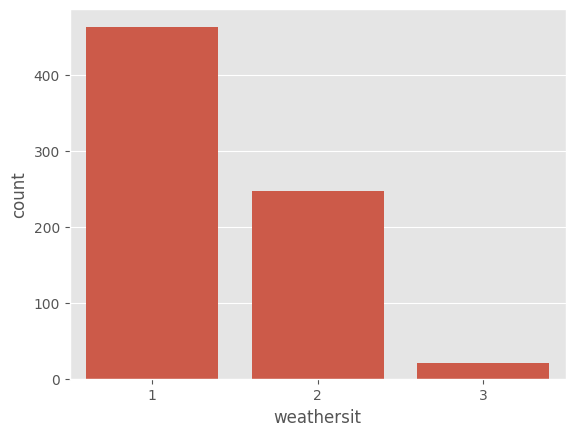

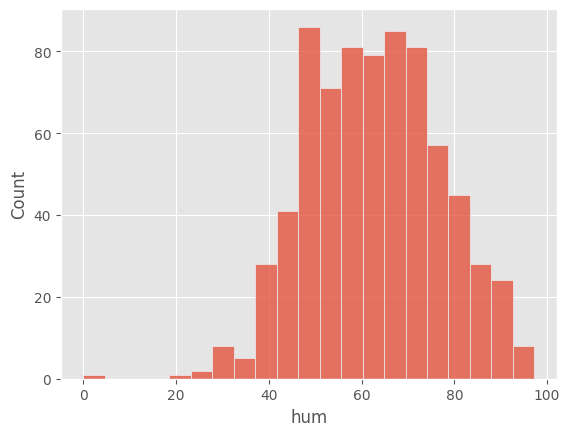

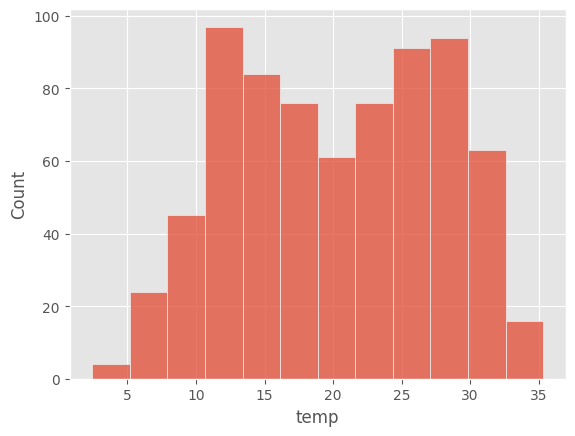

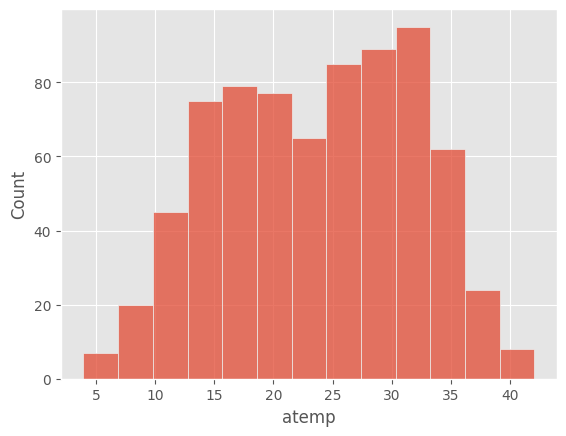

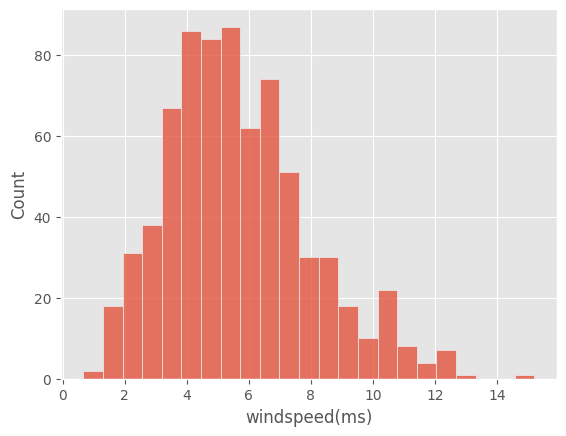

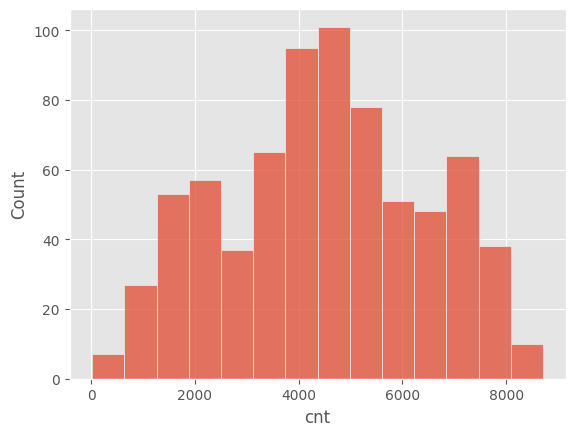

In [ ]:
sns.countplot(x='season', data=df)
plt.show()

sns.countplot(x='yr', data=df)
plt.show()

sns.countplot(x='mnth', data=df)
plt.show()

sns.countplot(x='holiday', data=df)
plt.show()

sns.countplot(x='weekday', data=df)
plt.show()

sns.countplot(x='workingday', data=df)
plt.show()

sns.countplot(x='weathersit', data=df)
plt.show()


sns.histplot(df['hum'],  kde=False)
plt.show()

sns.histplot(df['temp'], kde= False)
plt.show()

sns.histplot(df['atemp'], kde=False)
plt.show()

sns.histplot(df['windspeed(ms)'], kde=False)
plt.show()


sns.histplot(df['cnt'], kde=False)
plt.show()

Создание категориальных переменных

In [ ]:
df['weathersit']= df['weathersit'].map({1: 'Ясно', 2: 'Облачно', 3: 'Легкий дождь', 4: 'Ливень'},)

df['season']= df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

df['mnth']= df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

df['weekday']= df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

df['holiday']= df['holiday'].map({0: 'Нет праздника', 1: 'Праздник', 2:'sf'})
df['yr']= df['yr'].map({0: 'Первый год', 1: 'Второй год', 2:'sdf'})
df['workingday']= df['workingday'].map({0: 'Рабочий день', 1: 'Нерабочий день', 2:'sdf'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(ms),cnt
0,Spring,Первый год,Jan,Нет праздника,Sat,Рабочий день,Облачно,14.110847,18.18125,80.5833,4.805490,985
1,Spring,Первый год,Jan,Нет праздника,Sun,Рабочий день,Облачно,14.902598,17.68695,69.6087,7.443949,801
2,Spring,Первый год,Jan,Нет праздника,Mon,Нерабочий день,Ясно,8.050924,9.47025,43.7273,7.437060,1349
3,Spring,Первый год,Jan,Нет праздника,Tue,Нерабочий день,Ясно,8.200000,10.60610,59.0435,4.800998,1562
4,Spring,Первый год,Jan,Нет праздника,Wed,Нерабочий день,Ясно,9.305237,11.46350,43.6957,5.597810,1600


Определяем целевую переменную и визуализируем ее

<ipython-input-265-5293b634cec2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['cnt'], ax= ax[0], palette='Purples')
<ipython-input-265-5293b634cec2>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'], ax= ax[1], color= 'purple')


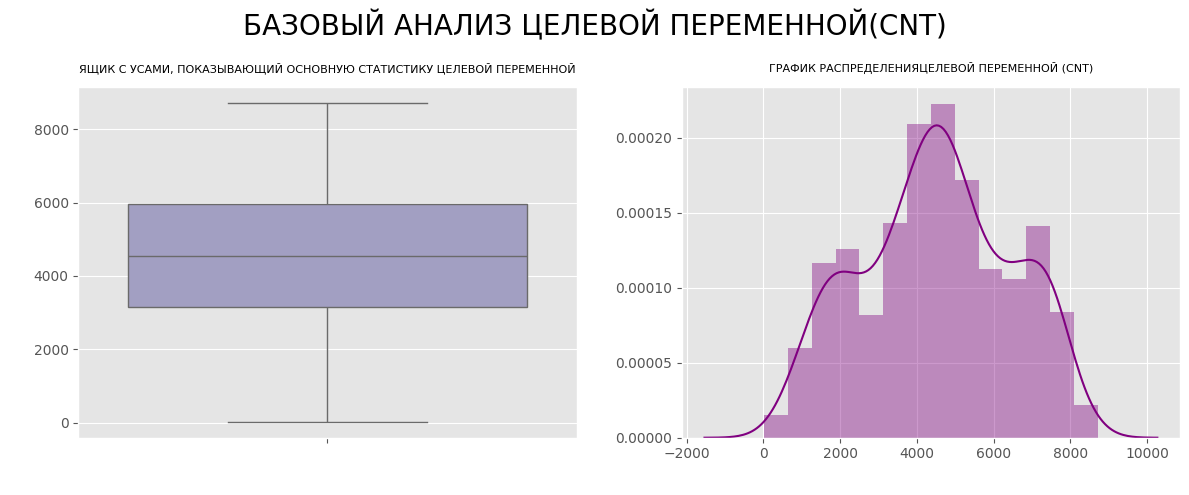

In [ ]:

fig, ax=plt.subplots(nrows=1, ncols=2, figsize= (12, 5))


fig.suptitle('базовый анализ целевой переменной(cnt)'.upper(), fontsize= 20)


sns.boxplot(y=df['cnt'], ax= ax[0], palette='Purples')
ax[0]. set_title('ящик с усами, показывающий основную статистику целевой переменной'.upper(),
fontsize= 8, fontweight= 20, y= 1.02)
ax[0]. set_ylabel(' ')
ax[0].set_xlabel(' ')


sns.distplot(df['cnt'], ax= ax[1], color= 'purple')
ax[1]. set_title('график распределенияцелевой переменной (cnt)'.upper(),
fontsize= 8, fontweight= 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')


plt.tight_layout()
plt.show()

Графики, отображающие изменения количественных переменных

<ipython-input-266-fb99cc2c8859>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[cont_var[i]], ax= ax[i], palette= 'Purples')
<ipython-input-266-fb99cc2c8859>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[cont_var[i]], ax= ax[i], palette= 'Purples')
<ipython-input-266-fb99cc2c8859>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[cont_var[i]], ax= ax[i], palette= 'Purples')
<ipython-input-266-fb99cc2c8859>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

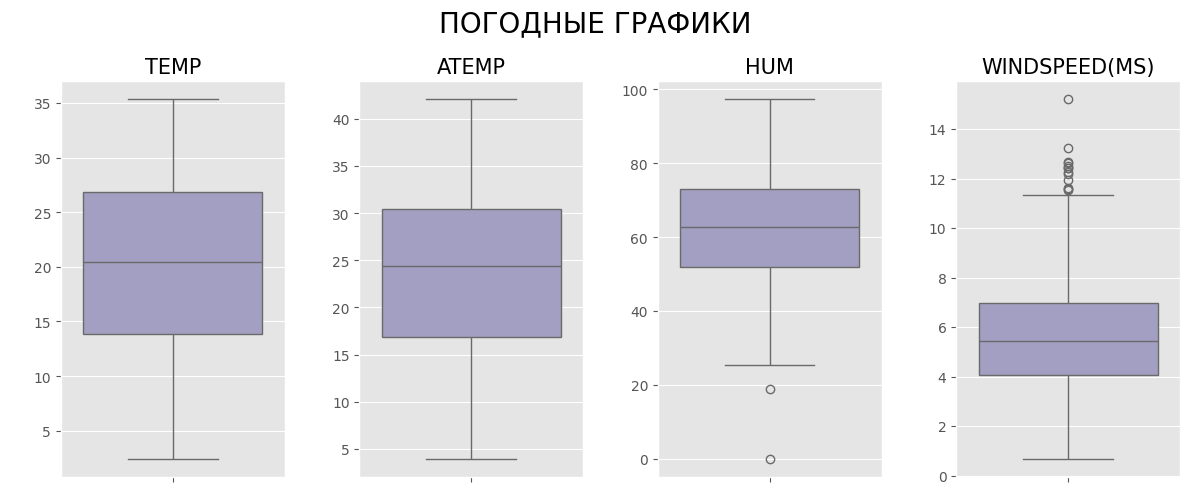

In [ ]:
cont_var= [i for i in df.select_dtypes(exclude= 'object').columns if df[i].nunique() > 2 and i != 'cnt']

# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (12, 5))

# Placing main title
plt.suptitle('Погодные графики'.upper(), fontsize= 20)

# Looping to fill subplot grid with plots
for i in range(len(cont_var)):

  sns.boxplot(y=df[cont_var[i]], ax= ax[i], palette= 'Purples')

# Setting aesthetics and readability
  ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
  ax[i].set_ylabel(' ')

# Setting final aesthetics
plt.tight_layout()
plt.show()


Числовые графики и их взаимодействие с графиком целевой переменной

<ipython-input-267-96ab50e0d57f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cont_var[i]], ax= ax[i], color= 'purple')
<ipython-input-267-96ab50e0d57f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cont_var[i]], ax= ax[i], color= 'purple')
<ipython-input-267-96ab50e0d57f>:10: Use

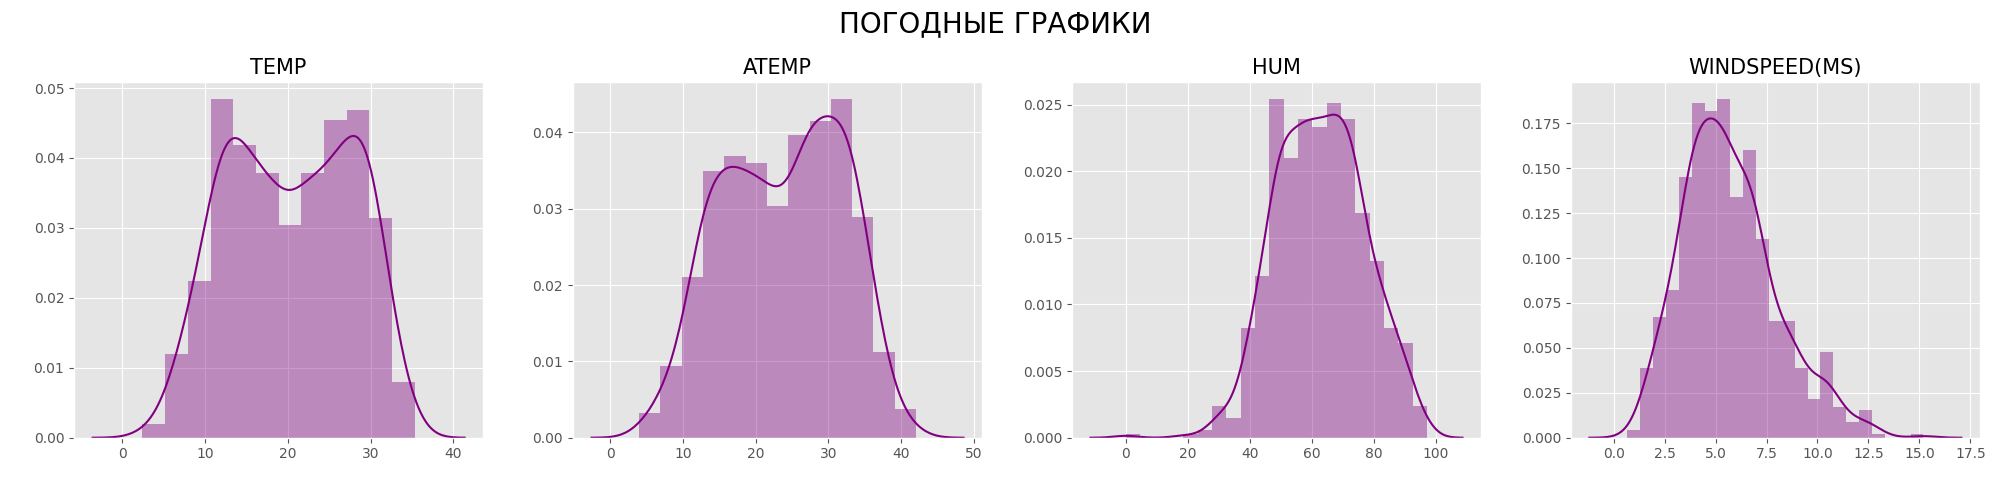

In [ ]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (20, 5))

# Placing main title
plt.suptitle('Погодные графики'.upper(), fontsize= 20)

# Looping to fill subplot grid with plots
for i in range(len(cont_var)):

  sns.distplot(df[cont_var[i]], ax= ax[i], color= 'purple')

# Setting aesthetics and readability
  ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
  ax[i].set_ylabel(' ')
  ax[i].set_xlabel(' ')

# Setting final aesthetics
plt.tight_layout()
plt.show()

In [ ]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,10.505372,1796


Визуализация категориальных переменных

<ipython-input-268-d449828e8f8b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[cat_var[k]], ax=ax[i, j], palette='Purples')
<ipython-input-268-d449828e8f8b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[cat_var[k]], ax=ax[i, j], palette='Purples')
<ipython-input-268-d449828e8f8b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[cat_var[k]], ax=ax[i, j], palette='Purples')
<ipython-input-268-d449828e8f8b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

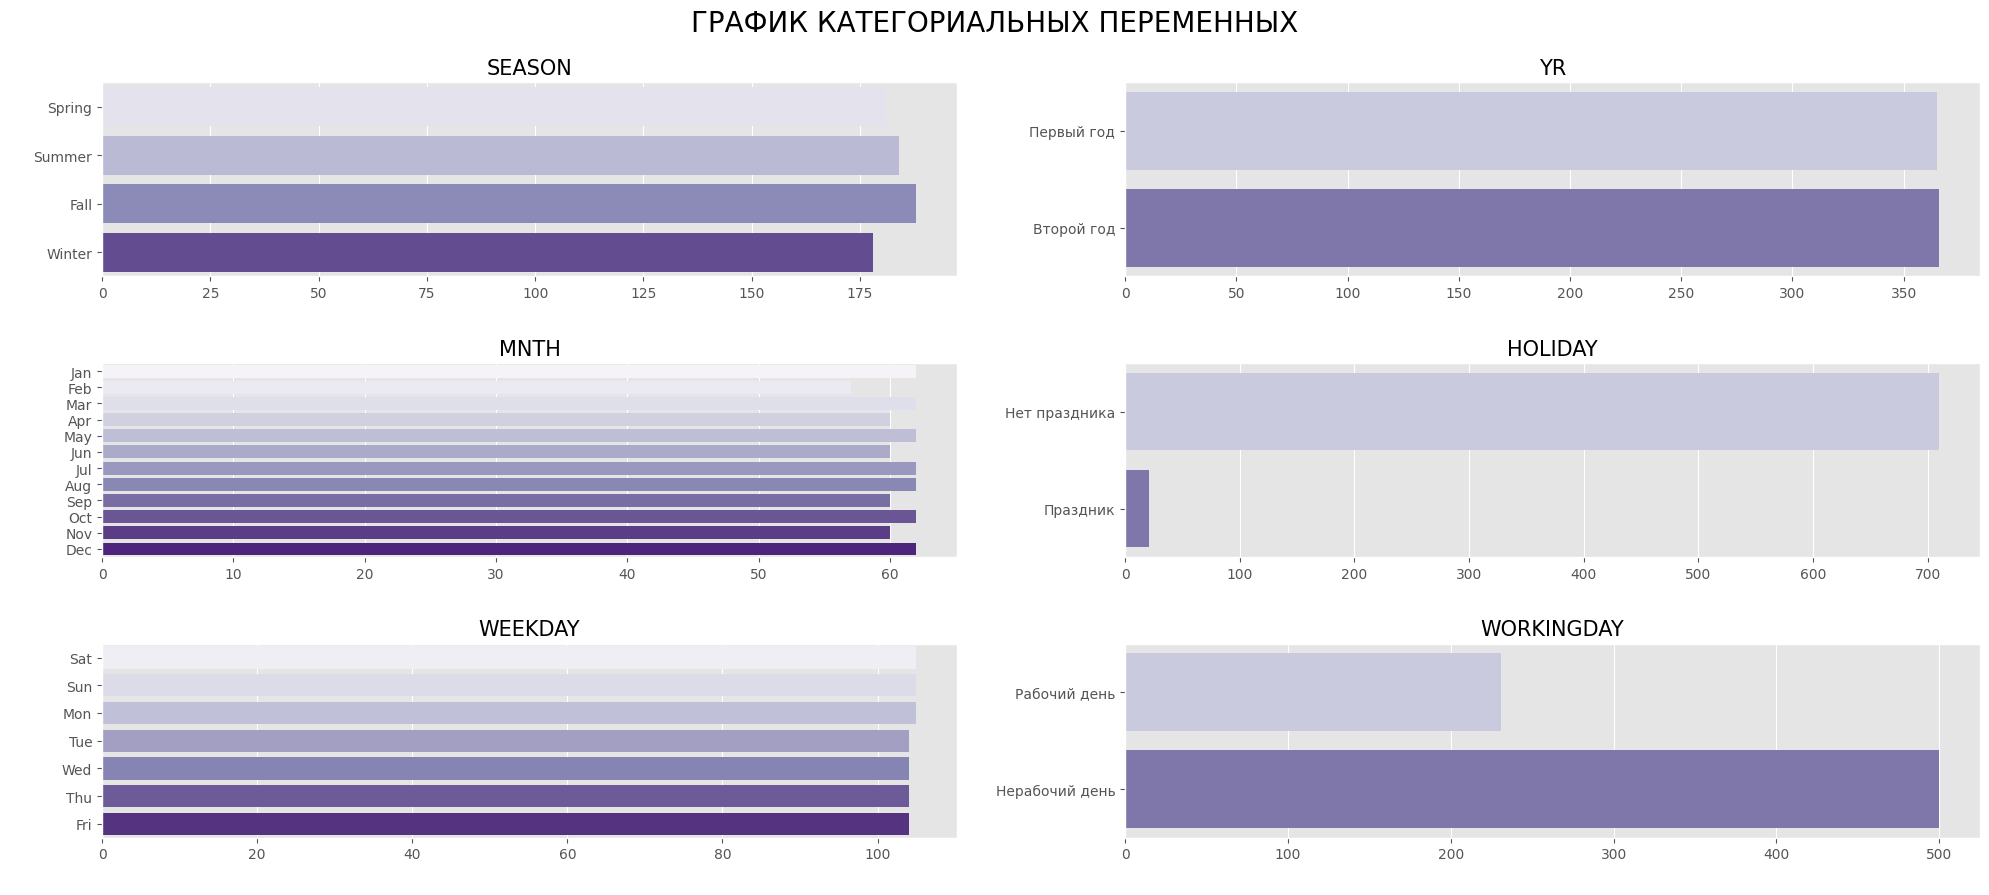

In [ ]:

cat_var= [i for i in df.select_dtypes(include= 'object').columns]
cat_var.extend([i for i in df.columns if df[i].nunique() == 2])
cols = list(df.columns)


fig, ax=plt.subplots(nrows= 3, ncols= 2, figsize= (20, 9))


plt.suptitle('График категориальных переменных'.upper(), fontsize= 20, fontweight= 20, y= 0.99)


k= 0
for i in range(3):
  for j in range(2):
    sns.countplot(df[cat_var[k]], ax=ax[i, j], palette='Purples')


    ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
    ax[i,j].set_ylabel(' ')
    ax[i,j].set_xlabel(' ')

    k+=1


plt.tight_layout()
plt.show()

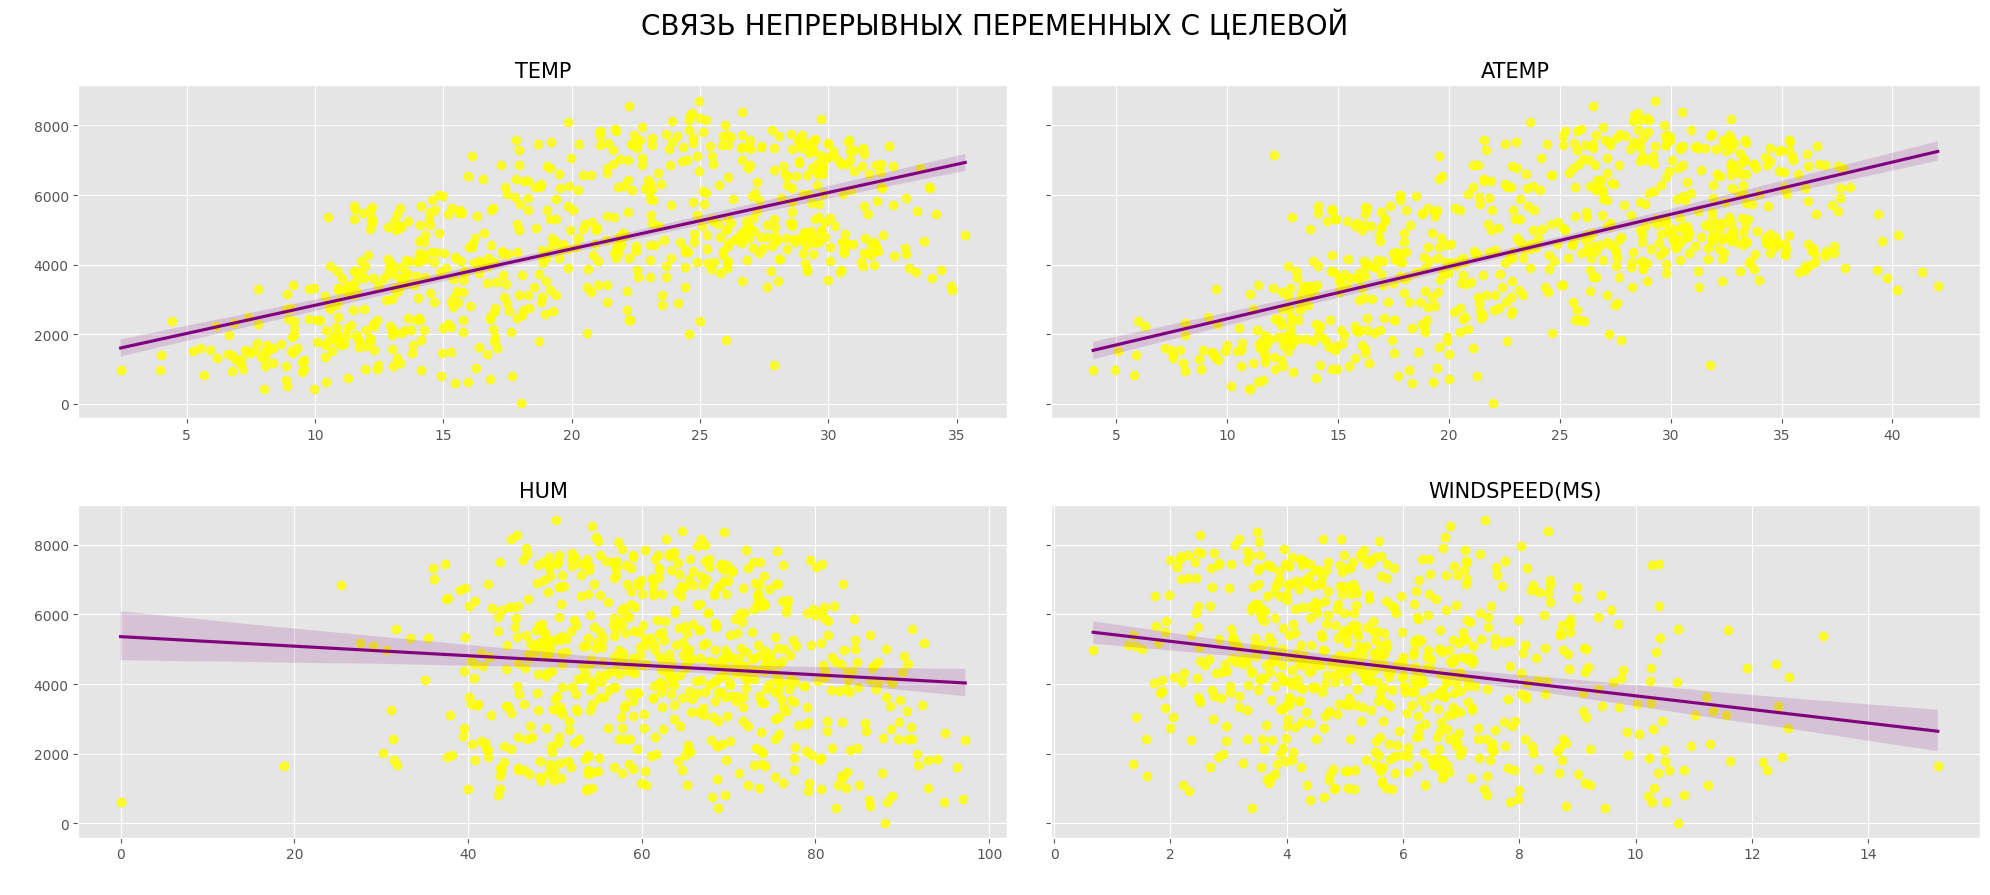

In [ ]:
# Creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20, 9), sharey= True)

# Placing main title
plt.suptitle('Связь непрерывных переменных с целевой'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

# Looping to fill subplot grid with plots
k= 0
for i in range(2):
  for j in range(int(len(cont_var)/2)):
    sns.regplot(x= df[cont_var[k]], y=df['cnt'], ax= ax[i, j],
    scatter_kws= {'color': 'yellow'}, line_kws= {'color': 'purple'})

# Setting aesthetics and readability
    ax[i,j].set_title(f'{cont_var[k].upper()}', fontsize= 15)
    ax[i,j].set_ylabel(' ')
    ax[i,j].set_xlabel(' ')

    k+=1

# Setting final aesthetics
plt.tight_layout()
plt.show()



Связь категориальных переменных с целевой

<ipython-input-270-a3fa687bbca6>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y= df.groupby(by= cat_var[k]).mean()['cnt'],
<ipython-input-270-a3fa687bbca6>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x= df.groupby(by= cat_var[k]).mean().index, ax= ax[i,j], palette= 'Purples')
<ipython-input-270-a3fa687bbca6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= df.groupby(by= cat_var[k]).mean()['cnt'],
<ipython-input-270-a3fa687bbca6>:10

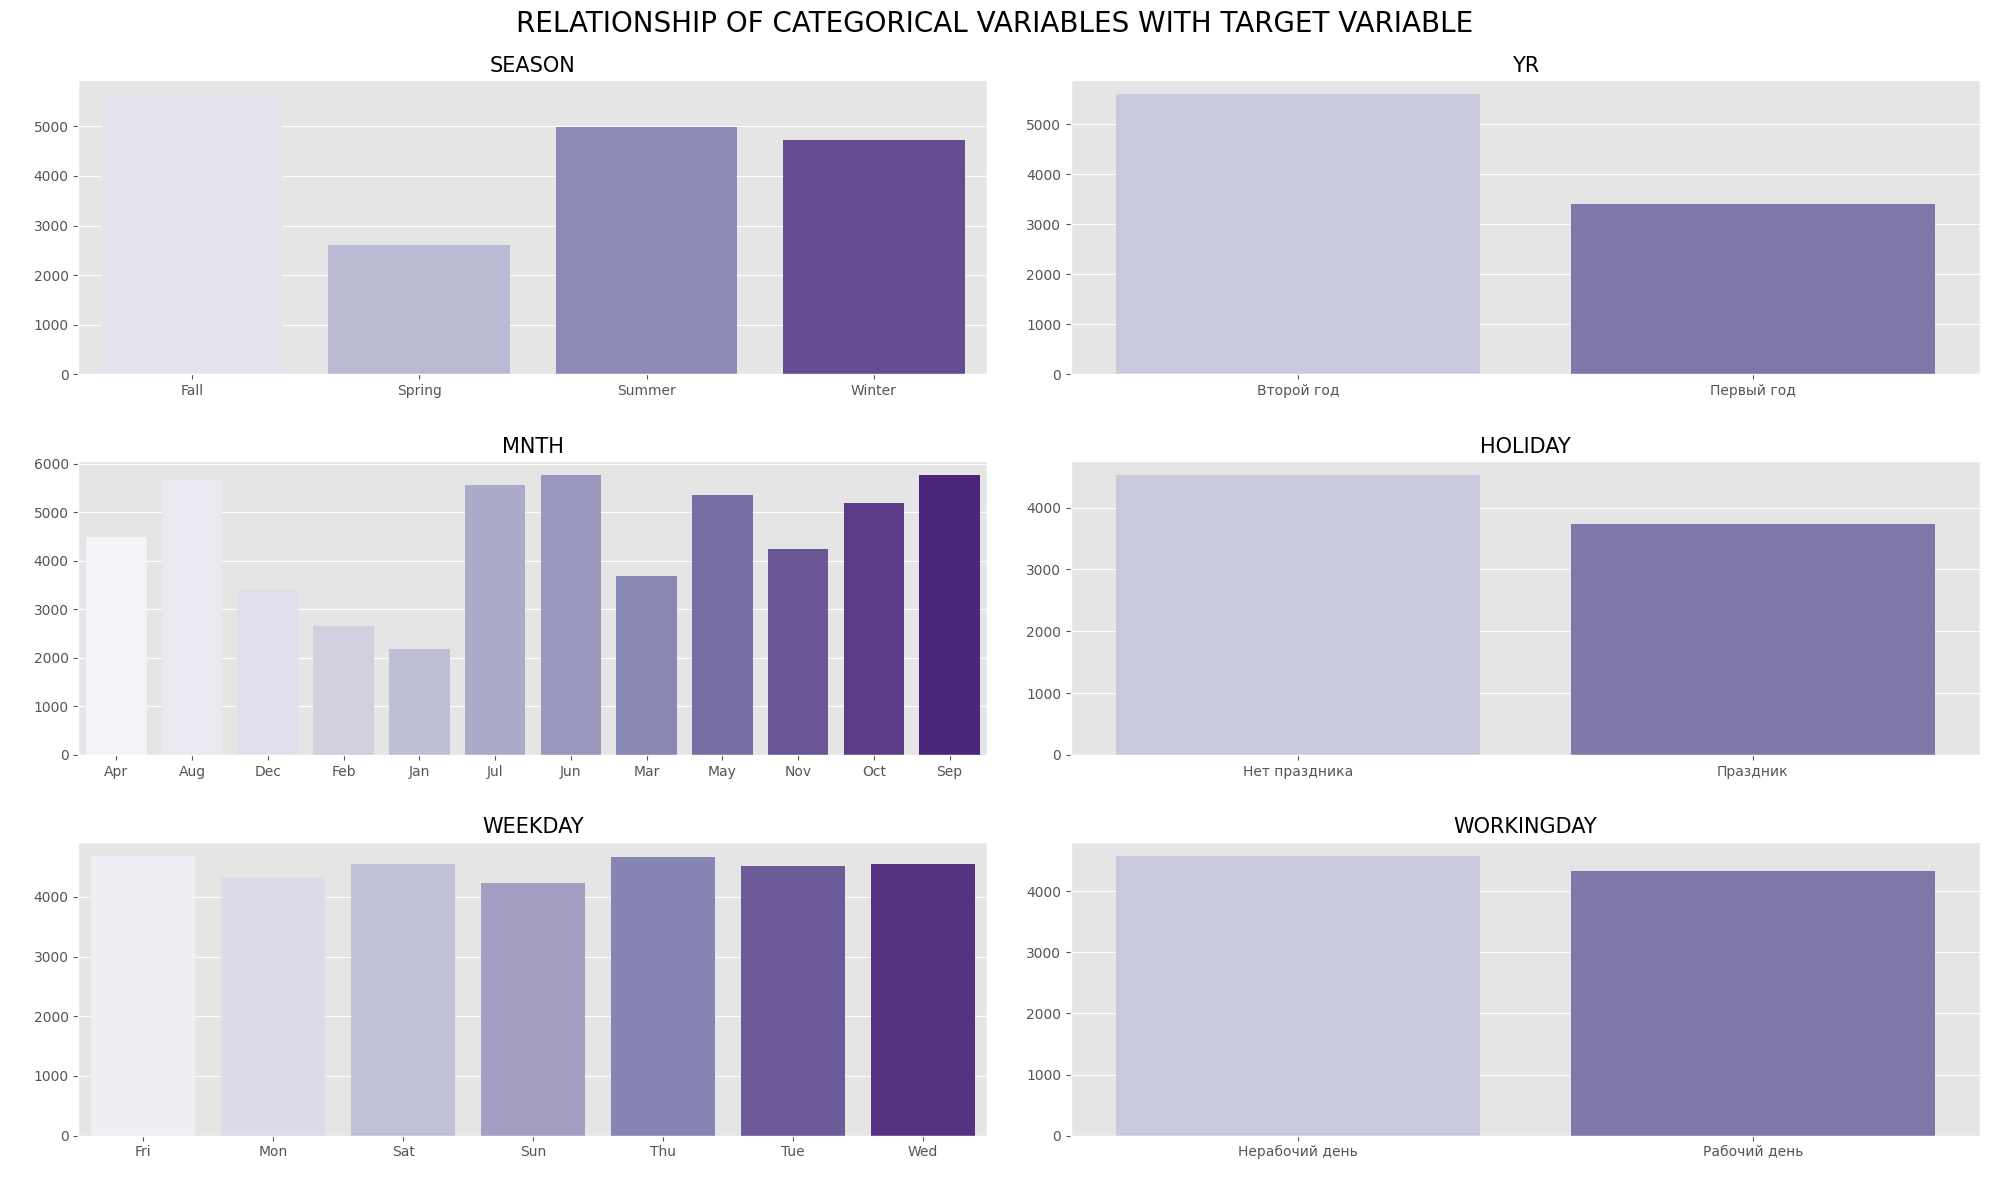

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols= 2, figsize= (20, 12))

# Placing main title
plt.suptitle('Связь категориальных переменных с целевой'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

# Looping to fill subplot grid with plots
k= 0
for i in range(3):
  for j in range(int(2)):
    sns.barplot(y= df.groupby(by= cat_var[k]).mean()['cnt'],
    x= df.groupby(by= cat_var[k]).mean().index, ax= ax[i,j], palette= 'Purples')

# Setting aesthetics and readability
    ax[i, j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
    ax[i,j].set_ylabel(' ')
    ax[i,j].set_xlabel(' ')

    k+=1

# Setting final aesthetics
plt.tight_layout()
plt.show()

Сопоставление категориальной переменной:Сезон с "погодными" переменными

<ipython-input-271-999f2f7542bc>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y= df.groupby(by='season').mean() [weather_var[i]], x= df.groupby(by='season') .mean() . index, ax= ax[i], palette= 'Purples')
<ipython-input-271-999f2f7542bc>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(y= df.groupby(by='season').mean() [weather_var[i]], x= df.groupby(by='season') .mean() . index, ax= ax[i], palette= 'Purples')
<ipython-input-271-999f2f7542bc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

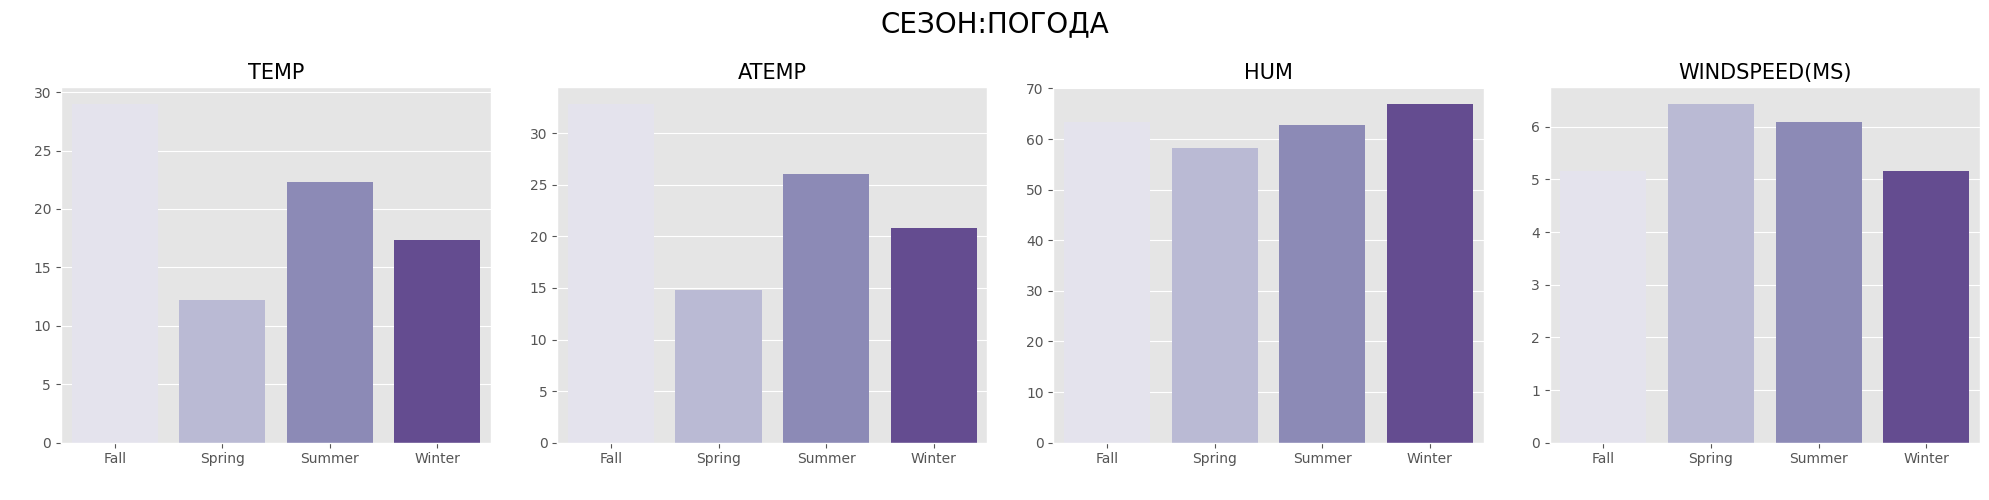

In [ ]:
# Initializing feature List for weather related continuous variables:
weather_var= ['temp', 'atemp', 'hum', 'windspeed(ms)']

# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(weather_var), figsize= (20, 5))

# Placing main title
plt.suptitle('Сезон:Погода'.upper(), fontsize= 20, fontweight= 15, y=0.99)

# Looping to fill subplot grid with plots
for i in range(len(weather_var)):
  sns.barplot(y= df.groupby(by='season').mean() [weather_var[i]], x= df.groupby(by='season') .mean() . index, ax= ax[i], palette= 'Purples')

# Setting aesthetics and readability
  ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
  ax[i].set_ylabel(' ')
  ax[i].set_xlabel(' ')

# Setting final aesthetics
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(by=['season','mnth']).mean()

<ipython-input-272-3cfd76a7fd49>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['season','mnth']).mean()


temp      atemp        hum  windspeed(ms)          cnt
season mnth                                                             
Fall   Aug   29.051844  32.573740  63.773010       5.179042  5664.419355
       Jul   30.974287  35.204693  59.787632       4.973599  5563.677419
       Jun   29.815540  33.567428  54.406250       5.768585  5769.400000
       Sep   25.597755  29.359852  71.831316       5.095217  5672.704545
Spring Dec   12.215995  14.729875  63.842477       6.394497  1954.454545
       Feb   12.268284  14.986563  56.746468       6.459912  2655.298246
       Jan    9.694201  11.989795  58.582827       6.178939  2176.338710
       Mar   16.012501  19.135314  56.983105       6.775969  3551.625000
Summer Apr   19.269952  22.854045  58.806312       7.022937  4484.900000
       Jun   27.164208  31.084715  59.167702       5.445927  5773.850000
       Mar   16.011340  19.029268  62.237318       6.477421  3947.954545
       May   24.386735  28.283100  68.895831       5.480670  5349.774194
Winter Dec   13.873371  17.175946  68.122917       4.681881  4200.950000
       Nov   15.138010  18.367938  62.487648       5.505005  4247.183333
       Oct   19.885500  23.598660  69.376087       5.247549  5199.225806
       Sep   24.390739  27.878984  70.481769       4.626379  6024.500000

from matplotlib import pyplot as plt
_df_65['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66['atemp'].plot(kind='hist', bins=20, title='atemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['hum'].plot(kind='hist', bins=20, title='hum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68['windspeed(ms)'].plot(kind='hist', bins=20, title='windspeed(ms)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='temp', y='atemp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70.plot(kind='scatter', x='atemp', y='hum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71.plot(kind='scatter', x='hum', y='windspeed(ms)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='windspeed(ms)', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_74['atemp'].plot(kind='line', figsize=(8, 4), title='atemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_75['hum'].plot(kind='line', figsize=(8, 4), title='hum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_76['windspeed(ms)'].plot(kind='line', figsize=(8, 4), title='windspeed(ms)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.corrwith(df['cnt'], axis=0, method='pearson')

<ipython-input-273-1cc3af98fb04>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['cnt'], axis=0, method='pearson')


temp             0.627494
atemp            0.631066
hum             -0.100659
windspeed(ms)   -0.234545
cnt              1.000000
dtype: float64

<ipython-input-274-c2858b9d3206>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap= 'Purples_r')


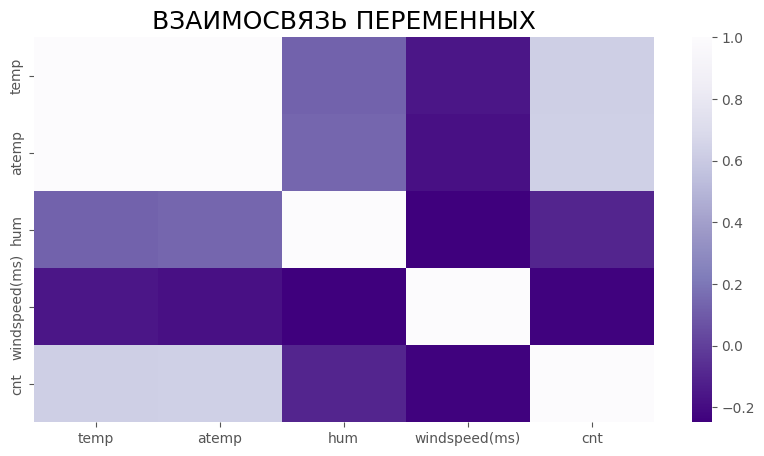

In [ ]:
# Setting plot size
plt.figure(figsize=(10,5))

# Plotting Heatmap
sns.heatmap(df.corr(), annot=False, cmap= 'Purples_r')

# Setting title
plt.title('взаимосвязь переменных'.upper(), fontsize= 18, y= 1)

plt.show()

In [ ]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(ms),cnt
0,Spring,Первый год,Jan,Нет праздника,Sat,Рабочий день,Облачно,14.110847,18.18125,80.5833,4.805490,985
1,Spring,Первый год,Jan,Нет праздника,Sun,Рабочий день,Облачно,14.902598,17.68695,69.6087,7.443949,801
2,Spring,Первый год,Jan,Нет праздника,Mon,Нерабочий день,Ясно,8.050924,9.47025,43.7273,7.437060,1349
3,Spring,Первый год,Jan,Нет праздника,Tue,Нерабочий день,Ясно,8.200000,10.60610,59.0435,4.800998,1562
4,Spring,Первый год,Jan,Нет праздника,Wed,Нерабочий день,Ясно,9.305237,11.46350,43.6957,5.597810,1600


**СОЗДАНИЕ ТРЕНИРОВОЧНОЙ И ТЕСТОВОЙ ВЫБОРКИ**

In [ ]:
df1=df.copy()

In [ ]:

dummy_list= [i for i in df1.select_dtypes(include= 'object').columns]



for i in dummy_list:
  my_d= pd.get_dummies(data= df1[i], drop_first= True)
  df1= pd.concat([df1, my_d], axis= 1).drop(labels= i, axis= 1)

In [ ]:
df1.head()

,temp,atemp,hum,windspeed(ms),cnt,Spring,Summer,Winter,Первый год,Aug,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
0,14.110847,18.18125,80.5833,4.805490,985,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,7.443949,801,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,7.437060,1349,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,8.200000,10.60610,59.0435,4.800998,1562,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,9.305237,11.46350,43.6957,5.597810,1600,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


Тепловая карта зависимости переменных

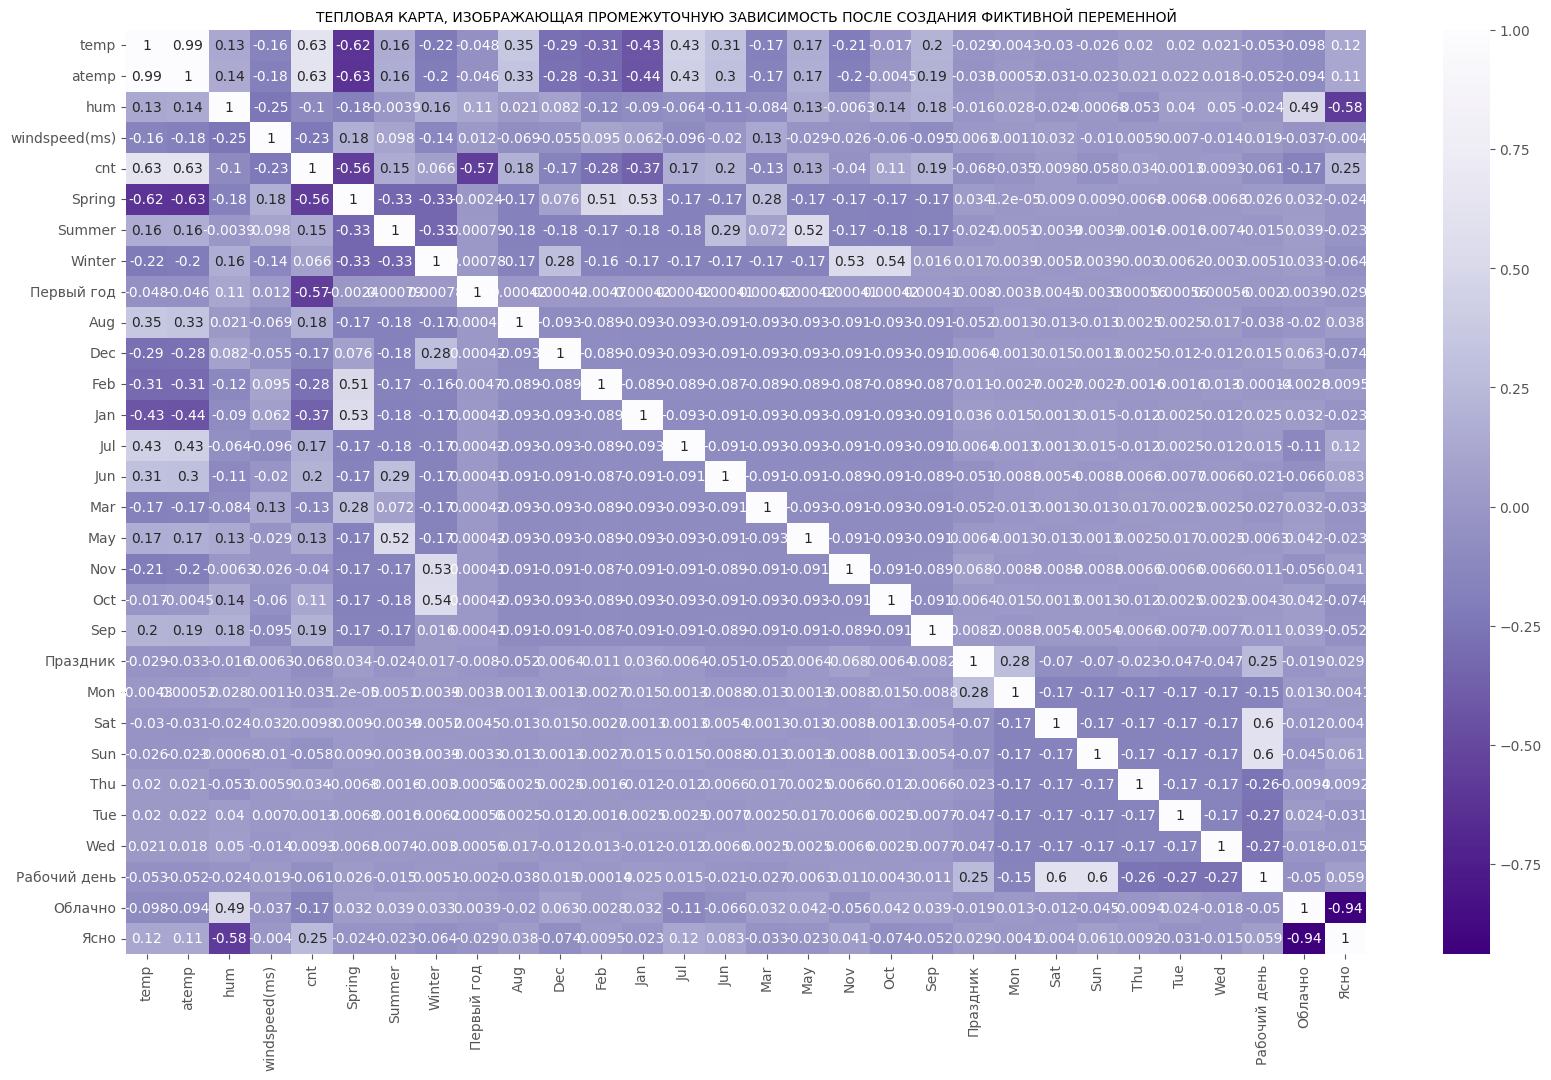

In [ ]:
# Re-plotting heatmap

plt.figure(figsize=(20,12))
plt.title('тепловая карта, изображающая промежуточную зависимость после создания фиктивной переменной'.upper(), fontsize=10, y= 1)
sns.heatmap(df1.corr(), annot= True, cmap= 'Purples_r', fmt= '.2g')
plt.show()

Таблица корреляции переменных

In [ ]:
col_list= []
ind_list= []
corr_type= []
corr_strength= []
corr_list= []

# Developing Loop

for i in range(len(df1.corr().columns)):
  for j in range(len(df1.corr().index)):

    if df1.corr().columns[i] !=df1.corr().index[j] and df1.corr().iloc[i,j] != 0:

      if df1.corr().iloc[i,j] < 0:

        if df1.corr().iloc[i, j] <= -0.7:
          col_list.append(df1.corr().columns[i])
          ind_list.append(df1.corr().index[j])
          corr_type.append('Negative')
          corr_strength.append('Strong')
          corr_list.append(round(df1.corr().iloc[i,j], 2))

        elif df1.corr().iloc[i,j] < -0.3:
          col_list.append(df1.corr().columns[i])
          ind_list.append(df1.corr().index[j])
          corr_type.append('Negative')
          corr_strength.append('Medium')
          corr_list.append(round(df1.corr().iloc[i,j], 2))

      else:

        if df1.corr().iloc[i,j] >= 0.7:
          col_list.append(df1.corr().columns[i])
          ind_list.append(df1.corr().index[j])
          corr_type.append('Positive')
          corr_strength.append('Strong')
          corr_list.append(round(df1.corr().iloc[i,j], 2))

        elif df1.corr().iloc[i,j]>0.3:
          col_list.append(df1.corr().columns[i])
          ind_list.append(df1.corr().index[j])
          corr_type.append('Positive')
          corr_strength.append('Strong')
          corr_list.append(round(df1.corr().iloc[i,j], 2))

In [ ]:


corr_df= pd.DataFrame({'Column1': col_list, 'Column2': ind_list, 'Relationship Strength': corr_strength,
'Relation Type': corr_type, 'Correlation C': corr_list})


corr_df

,Column1,Column2,Relationship Strength,Relation Type,Correlation C
0,temp,atemp,Strong,Positive,0.99
1,temp,cnt,Strong,Positive,0.63
2,temp,Spring,Medium,Negative,-0.62
3,temp,Aug,Strong,Positive,0.35
4,temp,Feb,Medium,Negative,-0.31
...,...,...,...,...,...
57,Рабочий день,Sun,Strong,Positive,0.60
58,Облачно,hum,Strong,Positive,0.49
59,Облачно,Ясно,Strong,Negative,-0.94
60,Ясно,hum,Medium,Negative,-0.58


Выбираем показатели, у которых сильный уровень корреляции

In [ ]:

corr_df[(corr_df['Relationship Strength'] == 'Strong')
& (corr_df['Relation Type'] == 'Positive') ]. sort_values(by= 'Correlation C', ascending= False)

,Column1,Column2,Relationship Strength,Relation Type,Correlation C
0,temp,atemp,Strong,Positive,0.99
8,atemp,temp,Strong,Positive,0.99
18,cnt,temp,Strong,Positive,0.63
9,atemp,cnt,Strong,Positive,0.63
1,temp,cnt,Strong,Positive,0.63
19,cnt,atemp,Strong,Positive,0.63
57,Рабочий день,Sun,Strong,Positive,0.60
56,Рабочий день,Sat,Strong,Positive,0.60
55,Sun,Рабочий день,Strong,Positive,0.60
54,Sat,Рабочий день,Strong,Positive,0.60


In [ ]:
df1.head

<bound method NDFrame.head of           temp     atemp      hum  windspeed(ms)   cnt  Spring  Summer  \
0    14.110847  18.18125  80.5833       4.805490   985       1       0   
1    14.902598  17.68695  69.6087       7.443949   801       1       0   
2     8.050924   9.47025  43.7273       7.437060  1349       1       0   
3     8.200000  10.60610  59.0435       4.800998  1562       1       0   
4     9.305237  11.46350  43.6957       5.597810  1600       1       0   
..         ...       ...      ...            ...   ...     ...     ...   
726  10.420847  11.33210  65.2917      10.486773  2114       1       0   
727  10.386653  12.75230  59.0000       4.656485  3095       1       0   
728  10.386653  12.12000  75.2917       3.725374  1341       1       0   
729  10.489153  11.58500  48.3333      10.505372  1796       1       0   
730   8.849153  11.17435  57.7500       4.637766  2729       1       0   

     Winter  Первый год  Aug  ...  Праздник  Mon  Sat  Sun  Thu  Tue  Wed  \
0   

Разбиение фрейма на два сета: тренировочный и тестовый

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Initializing bb_train, bb_test:
bb_train, bb_test= train_test_split(df1, test_size= 0.30, random_state= 100)

print(f'Training set: {bb_train.shape}')
print(f'Test set: {bb_test.shape}')

Training set: (511, 30)
Test set: (220, 30)


In [ ]:
bb_train.sample(5)

,temp,atemp,hum,windspeed(ms),cnt,Spring,Summer,Winter,Первый год,Aug,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
63,15.750847,18.93895,78.9167,7.543745,2077,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
729,10.489153,11.58500,48.3333,10.505372,1796,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
476,23.370000,27.14605,68.2917,8.493665,6624,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
458,19.133347,23.07415,39.6667,2.999066,6772,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
383,7.790000,9.50190,49.7500,6.593914,3292,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Нормализация данных

In [ ]:
# Creating a scaler instance

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

# Initializing a List of feature names for scaling
scaler_list= [i for i in bb_train.columns if bb_train[i].nunique() > 2]

# Scaling the variables and saving in our dataframe:
bb_train[scaler_list]= scaler.fit_transform(bb_train[scaler_list])


# Inspecting bb_train:
bb_train.head()

,temp,atemp,hum,windspeed(ms),cnt,Spring,Summer,Winter,Первый год,Aug,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
576,0.836974,0.795348,0.689137,0.239301,0.814887,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
426,0.366591,0.368552,0.677114,0.220569,0.364933,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
729,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
482,0.496388,0.490358,0.413052,0.656397,0.714565,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train= bb_train.pop('cnt')
X_train= bb_train

print(f'x_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

x_train shape: (511, 29), y_train shape: (511,)


In [ ]:
lm

LinearRegression()

Рекурсивное исключение объектов (RFE) - это алгоритм выбора объектов, который используется для выбора подмножества наиболее релевантных объектов из набора данных. Это рекурсивный процесс, который начинается со всех объектов в наборе данных, а затем итеративно удаляет наименее существенные объекты до тех пор, пока не будет достигнуто желаемое количество объектов.

In [ ]:
lm= LinearRegression()
from sklearn.feature_selection import RFE
#Fitting model with X Train and y train:
lm.fit(X_train, y_train)

#Creating RFE instance on fitted Lm:
rfe=RFE(lm)

#Converting rfe to fitted rfe
rfe= rfe.fit(X_train, y_train)
# Brief visual observation of results:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed(ms)', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 8),
 ('Winter', True, 1),
 ('Первый год', True, 1),
 ('Aug', False, 14),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 12),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', False, 2),
 ('Праздник', True, 1),
 ('Mon', False, 5),
 ('Sat', False, 6),
 ('Sun', False, 3),
 ('Thu', False, 16),
 ('Tue', False, 10),
 ('Wed', False, 15),
 ('Рабочий день', False, 7),
 ('Облачно', True, 1),
 ('Ясно', True, 1)]

In [ ]:
# Initializing another dataframe
temp_rfe_df= pd.DataFrame()

# Adding names of features:
temp_rfe_df['Col']= X_train.columns

# Adding rfe.support_ to dataframe (Returns bool type value: True if feature is recommended to be kept and False otherwise)
temp_rfe_df['RFE_Support']= rfe.support_

# Retaining only the values that are recommended to be included in initial model
temp_rfe_df= temp_rfe_df[temp_rfe_df['RFE_Support'] == True]

#Inspecting dataframe
temp_rfe_df

,Col,RFE_Support
0,temp,True
2,hum,True
3,windspeed(ms),True
4,Spring,True
6,Winter,True
7,Первый год,True
9,Dec,True
10,Feb,True
11,Jan,True
12,Jul,True


In [ ]:
# Initializing a List of features that are to be included in initial model signalled by above dataframe
my_cols= [i for i in temp_rfe_df['Col']]

# Retaining features that are recommended in X_train
X_train[my_cols]. head()



,temp,hum,windspeed(ms),Spring,Winter,Первый год,Dec,Feb,Jan,Jul,Nov,Праздник,Облачно,Ясно
576,0.836974,0.689137,0.239301,0,0,0,0,0,0,1,0,0,0,1
426,0.366591,0.677114,0.220569,1,0,0,0,0,0,0,0,0,1,0
729,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1
482,0.496388,0.413052,0.656397,0,0,0,0,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,0,1,0,0,0,0,0,0,1,0


Мультиколлинеарность в регрессионном анализе возникает, когда две или более независимых переменных сильно коррелируют друг с другом, так что они не предоставляют уникальную или независимую информацию в регрессионной модели. Если степень корреляции между переменными достаточно высока, это может вызвать проблемы при подгонке и интерпретации регрессионной модели.

Одним из способов обнаружения мультиколлинеарности является использование показателя, известного как коэффициент инфляции дисперсии (VIF) , который измеряет корреляцию и силу корреляции между независимыми переменными в регрессионной модели .

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_table(dataframe):

  # Initialize a dataframe
  vif= pd.DataFrame()

  # Adding feature names
  vif['Feature']= dataframe.columns

  # Adding feature VIF values
  vif['VIF Value']= [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns)) ]

  # Sorting dataframe
  vif= vif.sort_values(by= 'VIF Value', ascending= False)

  # Output
  return vif



Построение модели линейной регрессии

In [ ]:
import statsmodels.api as sm
def regmodel_ols(y_dataframe, X_dataframe):


  X_dataframe= sm.add_constant(X_dataframe)


  lm=sm.OLS(y_dataframe, X_dataframe).fit()


  print(lm.summary())


X_train_1= X_train[my_cols]

In [ ]:
# Building Regression Model
regmodel_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          1.98e-191
Time:                        21:24:19   Log-Likelihood:                 515.65
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -937.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3790      0.045      8.485

In [ ]:
vif_table(X_train_1)

,Feature,VIF Value
1,hum,23.29
0,temp,21.60
13,Ясно,13.44
12,Облачно,8.65
2,windspeed(ms),4.41
3,Spring,4.41
4,Winter,3.02
8,Jan,2.45
5,Первый год,2.03
7,Feb,1.97


Убираем сильновлияющие значения

In [ ]:
X_train_2= X_train_1.drop(labels= 'Feb', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          1.81e-191
Time:                        21:33:34   Log-Likelihood:                 512.96
No. Observations:                 511   AIC:                            -997.9
Df Residuals:                     497   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3706      0.045      8.290

In [ ]:
X_train_3= X_train_2.drop(labels= 'Праздник', axis= 1)

# Rebuilding Model
regmodel_ols(y_train, X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          1.00e-191
Time:                        21:34:37   Log-Likelihood:                 510.75
No. Observations:                 511   AIC:                            -995.5
Df Residuals:                     498   BIC:                            -940.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3748      0.045      8.363

t is the value of the t-statistic for testing if the corresponding coefficient is different from 0. (Hypothesis H0: coef==0, H1: coef!=0)
Pr>|t| is the p-value for this hypothesis test. A low p-value means, that you can reject the null-hypothesis and accept the alternative hypothesis (coef!=0).

In [ ]:
vif_table(X_train_3)

,Feature,VIF Value
1,hum,22.99
0,temp,20.70
11,Ясно,13.21
10,Облачно,8.58
2,windspeed(ms),4.40
3,Spring,3.34
4,Winter,3.01
5,Первый год,2.02
9,Nov,1.82
7,Jan,1.77


<ipython-input-363-62008f1afbd3>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y= residuals.values, x= ytrain_pred.values, palette= 'Purples', ax= ax[0])
<ipython-input-363-62008f1afbd3>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(y= residuals.mean(), x= ytrain_pred.values, palette= 'Purples', ax= ax[0])
<ipython-input-363-62008f1afbd3>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=10, color= 'Purple', ax= ax[1])


Text(0, 0.5, '')

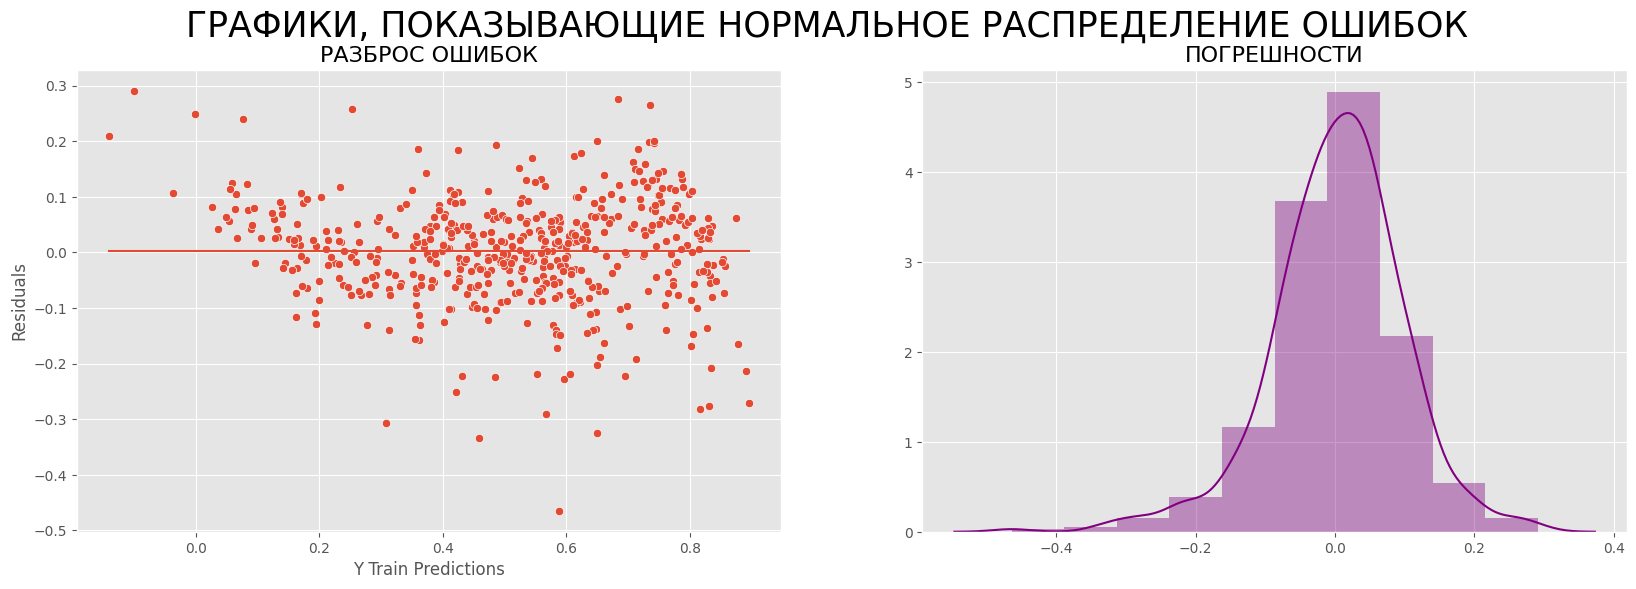

In [ ]:
lm= sm.OLS(y_train, X_train_3).fit()
ytrain_pred= lm.predict(X_train_3)
residuals= y_train-ytrain_pred

# Building subplots:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (20, 6))

# Setting main title:
plt.suptitle('графики, показывающие нормальное распределение ошибок'.upper(), fontsize= 25)

# Populating first plot:
sns.scatterplot(y= residuals.values, x= ytrain_pred.values, palette= 'Purples', ax= ax[0])
sns.lineplot(y= residuals.mean(), x= ytrain_pred.values, palette= 'Purples', ax= ax[0])

# Title, ylabel and xlabel setting of first plot:
ax[0].set_title('разброс ошибок'.upper(), fontsize= 16)
ax[0].set_ylabel('residuals'.title(), fontsize= 12)
ax[0].set_xlabel('y train predictions'.title(), fontsize= 12)

# Populating second plot:
sns.distplot(residuals, bins=10, color= 'Purple', ax= ax[1])

# Itle, ylabel ana xlabel setting of second plot:
ax[1].set_title('погрешности'.upper(), fontsize= 16)
ax[1].set_ylabel('')

In [ ]:
bb_test.sample(5)

,temp,atemp,hum,windspeed(ms),cnt,Spring,Summer,Winter,Первый год,Aug,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
9,6.184153,7.54440,48.2917,6.687031,1321.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
46,13.048701,15.81000,42.3478,7.541349,2115.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
277,22.071653,26.35690,64.7917,5.308784,4826.0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
272,23.130847,27.24145,64.7500,6.184097,5202.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
457,17.790433,21.37565,50.4348,9.348821,5936.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:

bb_test[scaler_list]= scaler.transform(bb_test[scaler_list])

In [ ]:
bb_test.sample(5)

,temp,atemp,hum,windspeed(ms),cnt,Spring,Summer,Winter,Первый год,Aug,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
78,13.632500,16.287500,47.3750,6.221416,2471.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
81,14.225237,16.896950,83.9565,7.016311,2121.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
22,3.957390,4.941955,43.6522,7.385874,986.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
239,28.989419,32.397950,56.1765,9.124789,4334.0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
300,13.564153,15.940600,58.5833,6.873086,3747.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


Нормализуем тестовую выборку

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

# Initializing a List of feature names for scaling
scaler_list= [i for i in bb_test.columns if bb_test[i].nunique() > 2]

# Scaling the variables and saving in our dataframe:
bb_test[scaler_list]= scaler.fit_transform(bb_test[scaler_list])


# Inspecting bb_train:
bb_test.sample(5)

,temp,atemp,hum,windspeed(ms),cnt,Spring,Summer,Winter,Первый год,Aug,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
216,0.816203,0.766603,0.488139,0.387203,0.545354,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
682,0.327925,0.308421,0.536205,0.762586,0.450210,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
637,0.592548,0.593042,0.356430,0.489567,1.000000,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
629,0.667838,0.650325,0.544944,0.314519,0.952181,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
370,0.315747,0.331845,0.355181,0.347152,0.450702,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_test= bb_test.pop('cnt')
X_test= bb_test

#Inspecting X_test
X_test.head()

,temp,atemp,hum,windspeed(ms),Spring,Summer,Winter,Первый год,Aug,Dec,...,Праздник,Mon,Sat,Sun,Thu,Tue,Wed,Рабочий день,Облачно,Ясно
184,0.837241,0.778767,0.498752,0.140963,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
535,0.786308,0.764025,0.576779,0.299699,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
299,0.496221,0.492359,0.760924,0.418376,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
221,0.890387,0.805661,0.178527,0.424328,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
152,0.821739,0.749249,0.000000,0.643878,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


Делаем прогноз

In [ ]:

X_test_new = X_test[X_train_3.columns]

y_test_pred = lm.predict(X_test_new)

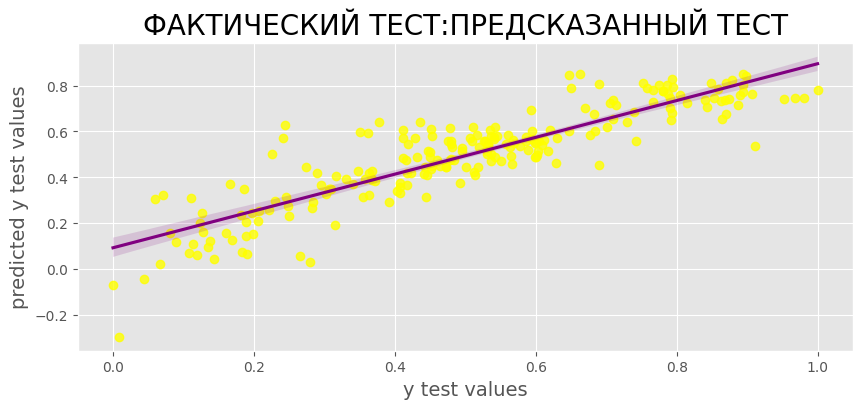

In [ ]:

fig = plt.figure(figsize= (10, 4))


sns.regplot(x= y_test,y= y_test_pred, scatter_kws= {'color': 'yellow'}, line_kws= {'color': 'purple'})


plt.title('фактический тест:предсказанный тест'.upper(), fontsize=20)
plt.xlabel('y test values', fontsize=14)
plt.ylabel('predicted y test values', fontsize=14)

plt.show()

После визуализации, оцениваем эффективность модели на выборках

In [ ]:
from sklearn.metrics import r2_score
print('R2 score на тестовой выборке:', round(r2_score(y_pred= y_test_pred, y_true= y_test), 5))
print('R2 score на тренировочной выборке:', round(r2_score(y_pred= ytrain_pred, y_true= y_train), 5))
print('возможность ошибки/потери данных:',
  abs(round(r2_score(y_pred= y_test_pred, y_true= y_test) - r2_score(y_pred= ytrain_pred, y_true= y_train), 5)))

R2 score на тестовой выборке: 0.78037
R2 score на тренировочной выборке: 0.82151
возможность ошибки/потери данных: 0.04114


In [ ]:


const= 0.2526

parameter_series= pd.Series(lm.params)
print(parameter_series)

temp             0.513228
hum              0.031433
windspeed(ms)   -0.096652
Spring          -0.079547
Winter           0.100918
Первый год      -0.226701
Dec             -0.047592
Jan             -0.036045
Jul             -0.083329
Nov             -0.056256
Облачно          0.330237
Ясно             0.410522
dtype: float64


<ipython-input-388-16aa73b12089>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parameter_series.index, y= parameter_series.values, palette= 'Purples_r')


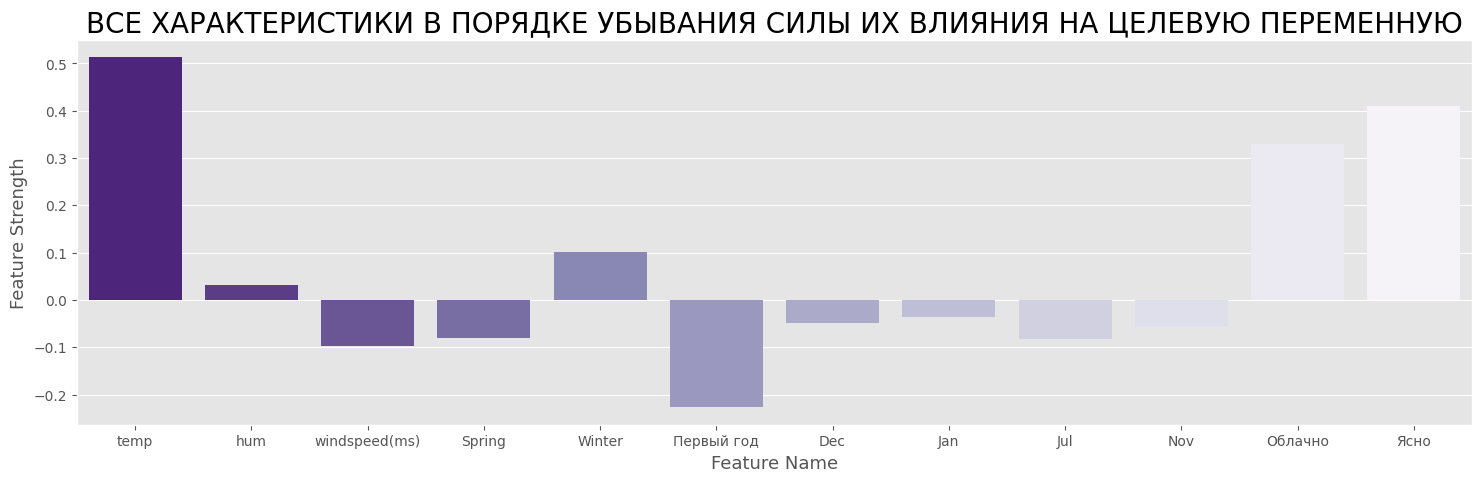

In [ ]:
# Defining plot size
plt.figure(figsize= (18, 5))

# Plotting
sns.barplot(x=parameter_series.index, y= parameter_series.values, palette= 'Purples_r')


plt.title('все характеристики в порядке убывания силы их влияния на целевую переменную'.upper(), fontsize= 20)
plt.xlabel('feature name'.title(), fontsize= 13)
plt.ylabel('feature strength'.title(), fontsize= 13)

plt.show()

Рекомендации


. Наиболее важным фактором, влияющим на спрос, является температура. При коэффициенте 0,73126 при каждом изменении температуры на 1
градус спрос увеличивается в 0,73126 раза (температура х 0,73126). Исходя из этого, компании придется учитывать:
. Необходимое наращивание мощностей в жаркие месяцы для удовлетворения спроса:
. Напомним из нашего раздела, что самые жаркие месяцы приходятся на осенний сезон, самыми жаркими являются июнь, июль и август.
. Если компания сможет увеличить свои ресурсы для удовлетворения растущего спроса в течение этих 3 месяцев, также будет разумно инвестировать в расширение маркетинговых
и рекламных мероприятий, если на том же рынке работает больше конкурентов с аналогичным предложением.

· Вторым по важности фактором является небольшой дождь или снег с коэффициентом -0,27750. Следовательно, если в определенный день идут небольшие
дожди, ожидается снижение спроса на 27,7%.
. Напомним из нашего раздела, что частота небольших дождей была самой низкой, а сильных дождей в основном не было. Октябрь месяц показывает
максимальное количество случаев небольших дождей.
. Исходя из этого, рекомендуется разработать рекламный план, основанный на настроениях, который активно продвигает "элемент веселья" в виде "катания на велосипедах под
дождем с семьей".